In [31]:
import pandas as pd
import os
import sys

# Go up one directory, then into scripts/
sys.path.append(os.path.abspath("../scripts"))

from indicators import add_technical_indicators

# Define the data folder (relative to notebook location)
data_dir = '../data'

# Mapping of file names to ticker symbols
file_ticker_map = {
    "AAPL_historical_data.csv": "AAPL",
    "AMZN_historical_data.csv": "AMZN",
    "GOOG_historical_data.csv": "GOOG",
    "META_historical_data.csv": "META",
    "MSFT_historical_data.csv": "MSFT",
    "NVDA_historical_data.csv": "NVDA",
    "TSLA_historical_data.csv": "TSLA"
}

def load_and_enrich_stock(file_path, ticker):
    """
    Load stock CSV, compute indicators, clean, and tag with ticker.
    """
    df = pd.read_csv(file_path)
    
    # Parse and sort dates
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)
    df.sort_values('Date', inplace=True)

    # Add technical indicators using TA-Lib
    df = add_technical_indicators(df)

    # Drop rows with any missing values in the indicator columns
    required_cols = ['SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']
    df.dropna(subset=required_cols, inplace=True)

    # Add ticker label
    df['Ticker'] = ticker

    return df

# Load and combine all stock data
stock_frames = [
    load_and_enrich_stock(os.path.join(data_dir, file), ticker)
    for file, ticker in file_ticker_map.items()
]

# Combine into a single DataFrame
stock_df = pd.concat(stock_frames, ignore_index=True)

# Preview the cleaned and enriched dataset
stock_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_Signal,MACD_Hist,Ticker
0,1981-01-30,0.127232,0.127232,0.126116,0.126116,0.097223,46188800,0.0,0.0,0.140681,39.642837,-0.000377,0.001789,-0.002166,AAPL
1,1981-02-02,0.119420,0.119420,0.118862,0.118862,0.091630,23766400,0.0,0.0,0.139090,34.943807,-0.001930,0.001045,-0.002975,AAPL
2,1981-02-03,0.123326,0.123884,0.123326,0.123326,0.095072,19152000,0.0,0.0,0.138058,39.682098,-0.002769,0.000282,-0.003051,AAPL
3,1981-02-04,0.127790,0.128348,0.127790,0.127790,0.098513,27865600,0.0,0.0,0.137556,44.069116,-0.003038,-0.000382,-0.002656,AAPL
4,1981-02-05,0.127790,0.128906,0.127790,0.127790,0.098513,7929600,0.0,0.0,0.137193,44.069116,-0.003215,-0.000949,-0.002266,AAPL


Mereged all the Stock data into one dataframe

In [32]:
stock_df.shape  # Display the shape of the DataFrame to confirm successful loading and processing

(45197, 15)

In [33]:
print(stock_df['Ticker'].unique())

['AAPL' 'AMZN' 'GOOG' 'META' 'MSFT' 'NVDA' 'TSLA']


To check we have the needed ticker name in the columns

In [34]:
import pandas as pd

# Load news/sentiment data
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Display column names to debug naming issues
print("Column names in the CSV file:", news_df.columns.tolist())

# Attempt to detect and normalize the date column
possible_date_cols = ['Date', 'date', 'DATE', 'Timestamp', 'timestamp']
date_col = None

# Find which column is likely the date column
for col in news_df.columns:
    if col.strip() in possible_date_cols:
        date_col = col
        break

if date_col is None:
    raise KeyError("No recognizable date column found in the news dataset.")

# Convert and clean date column
news_df['Date'] = pd.to_datetime(news_df[date_col], errors='coerce')
news_df.dropna(subset=['Date'], inplace=True)
news_df.sort_values('Date', inplace=True)

# Reset index after cleaning
news_df.reset_index(drop=True, inplace=True)

# Preview cleaned news data
print(news_df[['Date']].head())


Column names in the CSV file: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
                       Date
0 2011-04-27 21:01:48-04:00
1 2011-04-28 13:49:29-04:00
2 2011-04-28 15:00:36-04:00
3 2011-04-29 13:47:06-04:00
4 2011-04-29 16:11:05-04:00


Cleaned the news data

In [36]:
news_df.head()  # Display the first few rows of the cleaned news DataFrame

,Unnamed: 0,headline,url,publisher,date,stock,Date
0,357064,"ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)",https://www.benzinga.com/etfs/bond-etfs/11/04/...,ETF Professor,2011-04-27 21:01:48-04:00,DGP,2011-04-27 21:01:48-04:00
1,437774,A New Regional Emerging Markets ETF,https://www.benzinga.com/etfs/emerging-market-...,Sam Subramanian,2011-04-28 13:49:29-04:00,ESR,2011-04-28 13:49:29-04:00
2,350150,Dejour Extends Credit Facility to October 31st...,https://www.benzinga.com/news/11/04/1041764/de...,Theo Kratz,2011-04-28 15:00:36-04:00,DEJ,2011-04-28 15:00:36-04:00
3,49280,"ETF Showdown: Crouching Tigers, Hidden ETFs",https://www.benzinga.com/etfs/emerging-market-...,ETF Professor,2011-04-29 13:47:06-04:00,AIA,2011-04-29 13:47:06-04:00
4,539428,The GDL Fund to Redeem Its Outstanding 8.50% S...,https://www.benzinga.com/news/11/04/1045464/th...,Benzinga Staff,2011-04-29 16:11:05-04:00,GDL,2011-04-29 16:11:05-04:00


In [37]:
news_df.shape  # Display the shape of the DataFrame to confirm successful loading and processing

(55987, 7)

To see how much news data we have for each tickers 

In [38]:
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

for ticker in tickers:
    count = news_df[news_df['stock'] == ticker].shape[0]
    print(f"Number of news articles related to {ticker}: {count}")


Number of news articles related to AAPL: 10
Number of news articles related to AMZN: 10
Number of news articles related to GOOG: 10
Number of news articles related to META: 0
Number of news articles related to MSFT: 0
Number of news articles related to NVDA: 10
Number of news articles related to TSLA: 10


Sentiment Anaylyses

In [39]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Make sure VADER is downloaded
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
news_df['sentiment'] = news_df['headline'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Strip time and normalize 'Date' to date-only (no time)
news_df['Date'] = pd.to_datetime(news_df['Date']).dt.date

# Standardize ticker names (in case they're not uppercased)
news_df['stock'] = news_df['stock'].str.upper()

# Aggregate sentiment by (Date, stock)
daily_sentiment = news_df.groupby(['Date', 'stock'])['sentiment'].mean().reset_index()

# Rename columns to match stock_df format
daily_sentiment.rename(columns={'stock': 'Ticker'}, inplace=True)

# Preview
daily_sentiment.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Date,Ticker,sentiment
0,2011-04-27,DGP,0.0000
1,2011-04-28,DEJ,0.2500
2,2011-04-28,ESR,0.0000
3,2011-04-29,AIA,0.0000
4,2011-04-29,GDL,0.7351


To see all the sentiment data for all tickers 

In [40]:
daily_sentiment.shape  # Display the shape of the DataFrame to confirm successful loading and processing

(44196, 3)

Since we only want spesicfic tickers to be anaylyzed we need to create a new DF to store the filtered data

In [41]:
# Define the list of tickers you care about
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

# Filter daily_sentiment to keep only those tickers
Needed_Tickers = daily_sentiment[daily_sentiment['Ticker'].isin(tickers)].copy()

# Preview the result
print(Needed_Tickers.head())


             Date Ticker  sentiment
39993  2020-05-31   NVDA   0.421500
40524  2020-06-02   NVDA   0.220200
41287  2020-06-04   GOOG   0.000000
41787  2020-06-05   GOOG  -0.411033
42474  2020-06-08   GOOG   0.542300


In [42]:
Needed_Tickers.sort_values(by=[ 'Ticker','Date'], inplace=True)
Needed_Tickers.reset_index(drop=True, inplace=True)
Needed_Tickers.head(20)

,Date,Ticker,sentiment
0,2020-06-09,AAPL,0.246900
1,2020-06-10,AAPL,0.198850
2,2020-06-09,AMZN,0.077775
3,2020-06-10,AMZN,0.391233
4,2020-06-04,GOOG,0.000000
5,2020-06-05,GOOG,-0.411033
6,2020-06-08,GOOG,0.542300
7,2020-06-09,GOOG,0.000000
8,2020-06-10,GOOG,0.295833
9,2020-05-31,NVDA,0.421500


There is no META and MSFT ticker in the data

Calcualting Daily Return 

In [47]:
# Sort just to be safe
stock_df.sort_values(by=['Ticker', 'Date'], inplace=True)

# Calculate daily returns grouped by ticker
stock_df['Daily_Return'] = stock_df.groupby('Ticker')['Close'].pct_change()

# Drop the first row of each group (NaNs from pct_change)
stock_df.dropna(subset=['Daily_Return'], inplace=True)

# Preview
stock_df[['Date', 'Ticker', 'Close', 'Daily_Return']].head()


,Date,Ticker,Close,Daily_Return
2,1981-02-03,AAPL,0.123326,0.037556
3,1981-02-04,AAPL,0.127790,0.036197
4,1981-02-05,AAPL,0.127790,0.000000
5,1981-02-06,AAPL,0.128348,0.004366
6,1981-02-09,AAPL,0.121652,-0.052171


In [48]:
stock_df.shape  # Display the shape of the DataFrame to confirm successful loading and processing

(45183, 16)

In [50]:
daily_sentiment.shape  # Display the shape of the DataFrame to confirm successful loading and processing

(44196, 3)

In [51]:
daily_sentiment.rename(columns={'sentiment': 'Sentiment_Score'}, inplace=True)


In [54]:
# Ensure Date is datetime and sorted
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df.sort_values(by=['Ticker', 'Date'], inplace=True)

# Calculate daily return grouped by ticker
stock_df['daily_return'] = stock_df.groupby('Ticker')['Close'].pct_change()

# Confirm the column is added
print(stock_df[['Date', 'Ticker', 'Close', 'daily_return']].head())


        Date Ticker     Close  daily_return
2 1981-02-03   AAPL  0.123326           NaN
3 1981-02-04   AAPL  0.127790      0.036197
4 1981-02-05   AAPL  0.127790      0.000000
5 1981-02-06   AAPL  0.128348      0.004366
6 1981-02-09   AAPL  0.121652     -0.052171


Merging the data for the specific Tickers data

In [55]:
# Ensure date columns match format
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
Needed_Tickers['Date'] = pd.to_datetime(Needed_Tickers['Date']).dt.date

# Merge on Date and Ticker
merged_df = pd.merge(
    Needed_Tickers,
    stock_df[['Date', 'Ticker', 'daily_return']],
    left_on=['Date', 'Ticker'],
    right_on=['Date', 'Ticker'],
    how='inner'
)

# Drop missing values just in case
merged_df.dropna(subset=['sentiment', 'daily_return'], inplace=True)

# Final preview
print(merged_df[['Date', 'Ticker', 'sentiment', 'daily_return']].head())


         Date Ticker  sentiment  daily_return
0  2020-06-09   AAPL   0.246900      0.031578
1  2020-06-10   AAPL   0.198850      0.025728
2  2020-06-09   AMZN   0.077775      0.030427
3  2020-06-10   AMZN   0.391233      0.017913
4  2020-06-04   GOOG   0.000000     -0.016848


In [56]:
merged_df.shape  # Display the shape of the DataFrame to confirm successful merging

(14, 4)

In [61]:
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
daily_sentiment_filtered = daily_sentiment[daily_sentiment['Ticker'].isin(tickers)]


Correlation anaylses for the tickers we have 

In [27]:
from scipy.stats import pearsonr, spearmanr, kendalltau

# Store results
correlation_results = []

# Loop through each ticker
for ticker in merged_df['Ticker'].unique():
    ticker_df = merged_df[merged_df['Ticker'] == ticker]
    
    # Drop NaNs
    ticker_df = ticker_df.dropna(subset=['sentiment', 'daily_return'])
    
    if len(ticker_df) > 2:  # At least 3 data points required
        pearson_corr, _ = pearsonr(ticker_df['sentiment'], ticker_df['daily_return'])
        spearman_corr, _ = spearmanr(ticker_df['sentiment'], ticker_df['daily_return'])
        kendall_corr, _ = kendalltau(ticker_df['sentiment'], ticker_df['daily_return'])
        
        correlation_results.append({
            'Ticker': ticker,
            'Pearson': round(pearson_corr, 4),
            'Spearman': round(spearman_corr, 4),
            'Kendall': round(kendall_corr, 4),
            'Data Points': len(ticker_df)
        })
    else:
        correlation_results.append({
            'Ticker': ticker,
            'Pearson': None,
            'Spearman': None,
            'Kendall': None,
            'Data Points': len(ticker_df)
        })

# Display as a DataFrame
correlation_df = pd.DataFrame(correlation_results)
print(correlation_df)


  Ticker  Pearson  Spearman  Kendall  Data Points
0   AAPL      NaN       NaN      NaN            2
1   AMZN      NaN       NaN      NaN            2
2   GOOG  -0.2344   -0.4104  -0.3162            5
3   NVDA   0.5227    0.8000   0.6667            4
4   TSLA      NaN       NaN      NaN            1


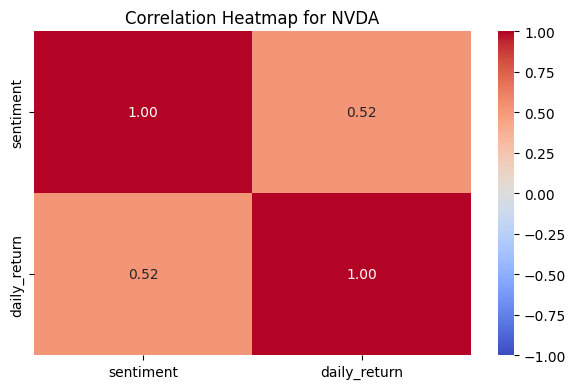

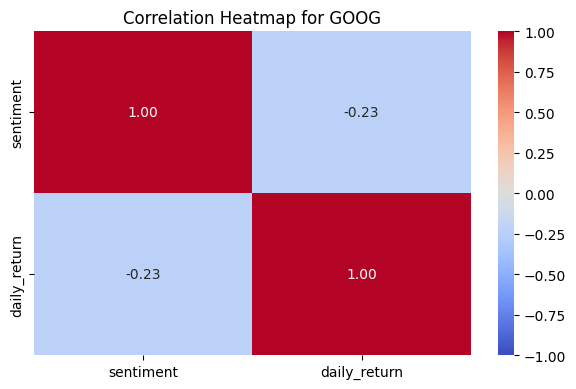

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select tickers you want to visualize
selected_tickers = ['NVDA', 'GOOG']

for ticker in selected_tickers:
    # Filter the data
    ticker_df = merged_df[merged_df['Ticker'] == ticker].dropna(subset=['sentiment', 'daily_return'])

    # Only proceed if more than 2 data points exist
    if len(ticker_df) > 2:
        # Compute correlation matrix
        corr_matrix = ticker_df[['sentiment', 'daily_return']].corr()

        # Plot heatmap
        plt.figure(figsize=(6, 4))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
        plt.title(f'Correlation Heatmap for {ticker}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data to compute correlation for {ticker} (only {len(ticker_df)} points).")


🧪 Correlation Analysis: Sentiment vs Daily Return
After merging daily news sentiment with corresponding stock price data, we calculated Pearson, Spearman, and Kendall correlation coefficients for each ticker. The results are summarized below:

Ticker	Pearson	Spearman	Kendall	Data Points
AAPL	NaN	NaN	NaN	2
AMZN	NaN	NaN	NaN	2
GOOG	-0.2344	-0.4104	-0.3162	5
NVDA	0.5227	0.8000	0.6667	4
TSLA	NaN	NaN	NaN	1

📉 Why Are There NaN Values?
Insufficient Data: Tickers like AAPL, AMZN, and TSLA had fewer than 3 data points after merging sentiment and price data. Most correlation techniques (especially Spearman and Kendall) require at least 3 non-null paired observations to compute a statistically meaningful relationship.

When fewer than 3 valid data points are present, correlation functions return NaN, indicating the result is undefined or unreliable.

🔍 Why Are META and MSFT Missing?
These tickers do not appear in the final merged dataset (merged_df) at all.

Possible reasons:

There are no news headlines for META and MSFT in the raw_analyst_ratings.csv file.

Or, although news existed, it did not match with any available stock price date (i.e., no overlap in dates between sentiment data and stock price data).

Another possibility is a mismatch in ticker names (e.g., META used to be FB)—this might lead to their exclusion during filtering.

✅ Useful Ticker Correlations
GOOG and NVDA had sufficient data points (5 and 4 respectively) to compute correlations.

NVDA showed a moderately strong positive correlation between sentiment and return across all three metrics, suggesting news sentiment may influence or reflect short-term returns.

GOOG had a weak to moderate negative correlation, indicating a potential inverse relationship, though the small sample size warrants caution in interpretation.